In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import nibabel as nb
import networkx as nx
import os

from multiplot import feature_plot
from collections import OrderedDict

font = {'weight' : 'bold',
        'size'   : 14}

import matplotlib
matplotlib.rc('font', **font)

In [2]:
# Initializing dataset names
dnames = list(('/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/KKI2009/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/MRN114/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/MRN1313/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/SWU4/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/BNU1/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/BNU3/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/NKI1/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/NKIENH/'))

names = list(('KKI2009', 'MRN114', 'MRN1313', 'SWU4', 'BNU1', 'BNU3', 'NKI1', 'NKIENH'))

print "Datasets: " + ", ".join(names)
print "D = " + str(len(names))

# Getting graph names
fs = OrderedDict()

for idx, dd in enumerate(names):
        fs[dd] = [root+fl for root, dir, files in os.walk(dnames[idx]) for fl in files if fl.endswith(".graphml")]

Datasets: KKI2009, MRN114, MRN1313, SWU4, BNU1, BNU3, NKI1, NKIENH
D = 8


In [3]:
def loadGraphs(filenames, printer=False):
        gstruct = OrderedDict()
        for idx, files in enumerate(filenames):
            if printer:
                print "Loading: " + files
            gstruct[files] = nx.read_graphml(files)
        return gstruct

In [4]:
graphs = OrderedDict()
for idx, name in enumerate(names):
    graphs[name] = loadGraphs(fs[name], printer=False)

In [5]:
graphs.keys()

['KKI2009', 'MRN114', 'MRN1313', 'SWU4', 'BNU1', 'BNU3', 'NKI1', 'NKIENH']

In [6]:
nnz = OrderedDict()
for idx, name in enumerate(names):
    nnz[name] = OrderedDict((subj, len(nx.edges(graphs[name][subj]))) for subj in graphs[name])

In [7]:
nnz['MRN1313'][nnz['MRN1313'].keys()[0]]

990

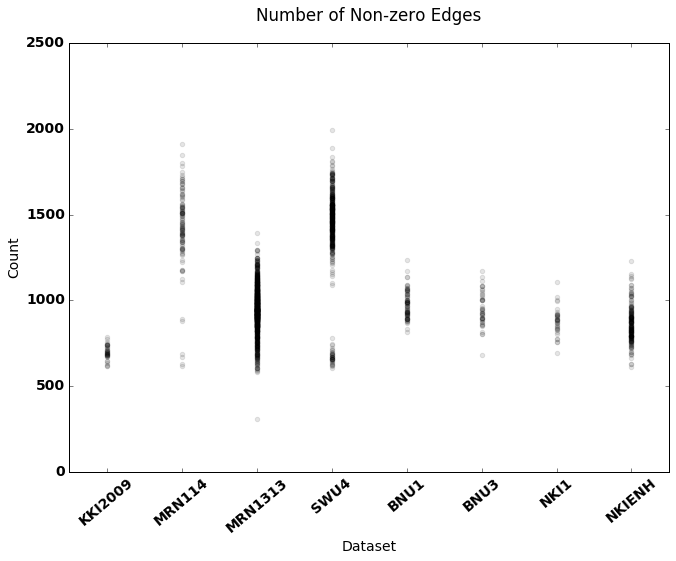

<multiplot.feature_plot instance at 0x132f070e0>

In [10]:
feature_plot(nnz, names, 'Number of Non-zero Edges', plotm='scatter', figname = './multi_nnz_scatter.png')

[2, 4]


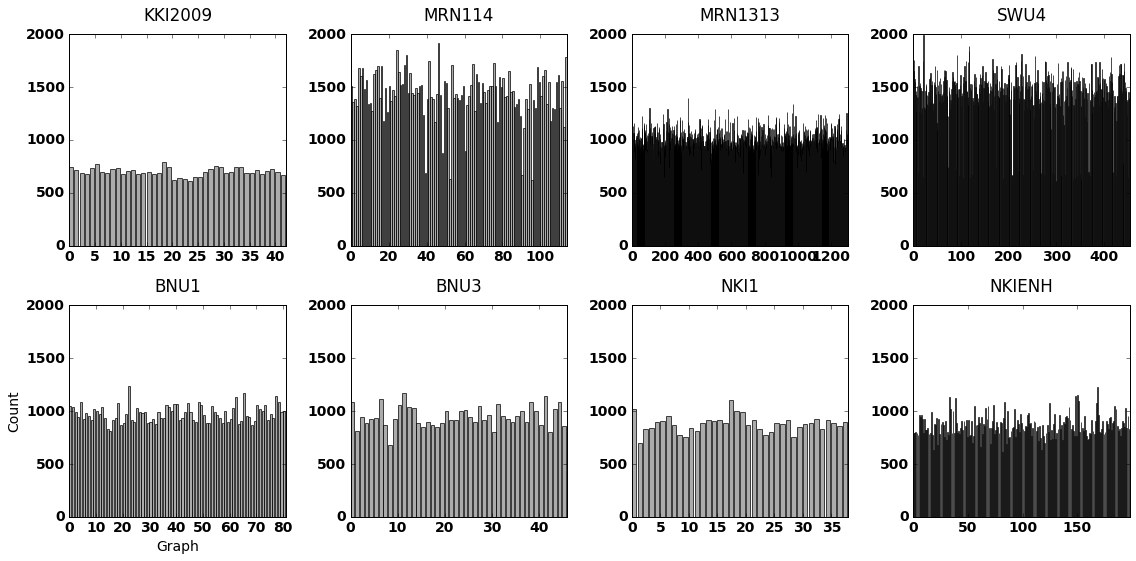

<multiplot.feature_plot instance at 0x111bcc440>

In [11]:
feature_plot(nnz, names, 'Number of Non-zero Edges', plotm='bar', ylims=[0, 2000], figname = './multi_nnz_bar.png')

['KKI2009', 'BNU1', 'BNU3', 'NKI1', 'NKIENH', 'MRN114', 'MRN1313', 'SWU4']
[2, 4]


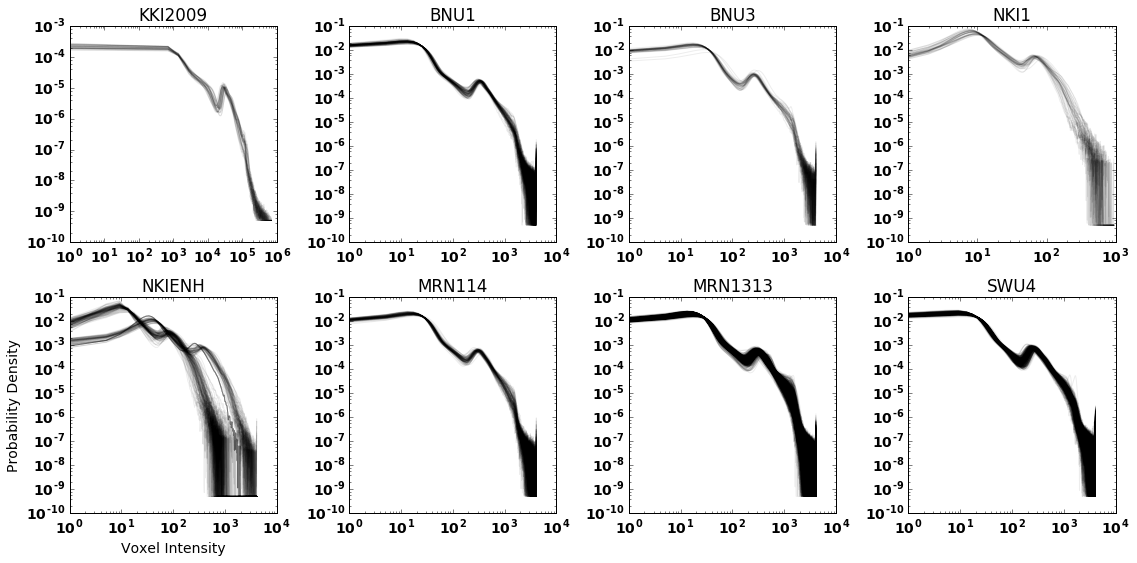

<multiplot.hist_plot instance at 0x10b4ca7a0>

In [3]:
hist_plot(data, names, figname='./multi_nnz.png')